# Kernels

* Hasta ahora el SVM era capaz de encontrar fronteras lineales en el espacio vectorial. Pero también podemos hacer extensiones a ese algortimo añadiendo otro tipo de restricciones no solo lineales como polinomiales, por ejemplo.
* De forma general las fornteras se puede definir en otro espacio vectorial, utilizando otra base, que nos separe mejor el conjunto de entrenamiento.

<img src="img/SVM_kernels_1.jpg" width="600">

<img src="img/SVM_kernels_2.jpg" width="600">

<img src="img/SVM_kernels_3.jpg" width="200">

## Identificar fronteras no lineales

In [1]:
from sklearn.datasets.samples_generator import make_circles, make_blobs

/home/david/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
X, Y = make_circles(100, factor = .1, noise = .1) 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [4]:
#copiamos esta funcion de T8-3 SVM Model
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

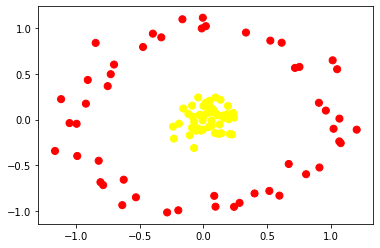

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

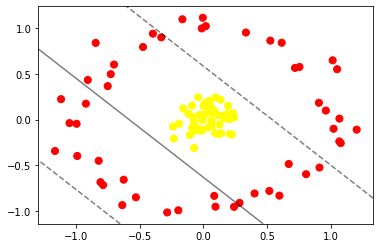

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

* **Vemos que con las rectas no se pueden separar este tipo de puntos.**

## 1ª Forma: Aumentando la dimesión para separar.

**Podríamos suponer que estamos en 3D y que los puntos rojos se encuentran por encima de los amarillos(si viesemos la gráfica desde arriba).** 

* Por ello podemos suponer que si usamos como separador una campana Gaussiana(e^-(x^2) centrada en 0). Los puntos amarillos sería la cúpula de la campana y los rojos las faldas.

In [7]:
r = np.exp(-(X**2).sum(1)) #la normalizamos diciendole que la suma de sus componentes sea 1(sum(1))

In [8]:
r

array([0.29131593, 0.27619337, 0.94203518, 0.36038086, 0.329752  ,
       0.32938559, 0.94140642, 0.45915746, 0.42427731, 0.94168609,
       0.2308623 , 0.98594829, 0.95626753, 0.98508128, 0.49350166,
       0.34707055, 0.27149747, 0.2440234 , 0.92557391, 0.36387834,
       0.99122511, 0.35891861, 0.36904278, 0.93889336, 0.97827924,
       0.94315409, 0.98216986, 0.3205247 , 0.99828825, 0.9754687 ,
       0.98398194, 0.98183566, 0.42434602, 0.99340325, 0.9822518 ,
       0.37802828, 0.29103003, 0.9964566 , 0.99415732, 0.41445804,
       0.41372348, 0.22740314, 0.35794152, 0.96176986, 0.35220247,
       0.90257787, 0.43222971, 0.39818524, 0.99577948, 0.36892169,
       0.98857883, 0.96113926, 0.4372253 , 0.93496174, 0.49606199,
       0.99065452, 0.39841107, 0.50290705, 0.33693668, 0.98521208,
       0.99167042, 0.95855361, 0.34916887, 0.98768816, 0.40510696,
       0.42340226, 0.30126141, 0.41280438, 0.96053735, 0.9069602 ,
       0.97787807, 0.31827368, 0.98251186, 0.97420536, 0.36220

In [9]:
from mpl_toolkits import mplot3d

In [10]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r): 
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1],r, c=Y, s= 50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim) #para poner la vista inicial de la gráfica3D 
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")
    
    

In [11]:
from ipywidgets import interact, fixed

In [12]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150, 180], 
         X = fixed(X), Y = fixed(Y), r = fixed(r)) #al poner fixed, colocamos como fijos

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 1.08012265e+00, -2.58228577e-01],
       [-6.38232540e-01, -9.37717042e-01],
       [ 1.93332414e-01,  1.49449785e-01],
       [ 3.34493277e-01,  9.53261827e-01],
       [ 9.12790411e-01, -5.25574064e-01],
       [-1.05310646e+00, -3.86393413e-02],
       [-4.11750296e-02,  2.42249764e-01],
       [-7.28929820e-01,  4.97014475e-01],
       [-4.74810508e-01,  7.94935835e-01],
       [ 2.34589891e-01,  7.10695452e-02],
       [ 1.20567068e+00, -1.10869509e-01],
       [ 9.35587745e-02,  7.34719619e-02],
       [ 4.81469339e-02,  2.05911221e-01],
       [-2.02865785e-02, -1.20911440e-01],
       [ 8.51582678e-02, -8.36048522e-01],
       [ 1.02373299e+00, -1.00985086e-01],
       [-1.11974115e+00,  2.23567071e-01],
       [ 1.05179182e+00,  5.51566067e-01],
       [ 2.24955229e-01, -1.63512800e-01],
       [ 8.07653538e-01, -5.98858460e-01],
       [ 6.39242910e-02, -6.87553921e-02],
       [ 5.26366824e-01,  8.64637255e-01],
       

## 2ª Forma: Radial basis function (rbf)

* Básicamente busca formas circulares que separen nuestros datos.

In [51]:
rbf = SVC(kernel="rbf", C=1E6, gamma='scale')
rbf.fit(X,Y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

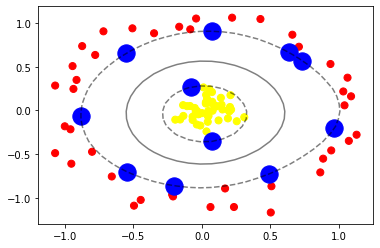

In [53]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn") #dibujamos los puntos
plt_svc(rbf) #aplicamos nuestra funcń de decisión, nos dibuja las lineas(continuas y discontinuas)
#plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue") #esto ya lo hace la funcion plt_svc()

## Ajustar los parámetros de SVM

In [62]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=1.2)

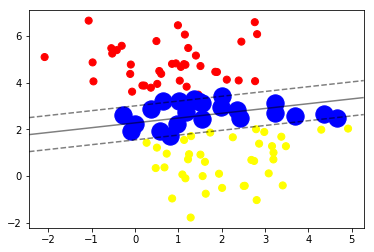

In [66]:
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=10)
model.fit(X,Y)
plt_svc(model)

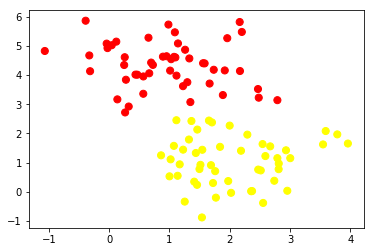

In [53]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")

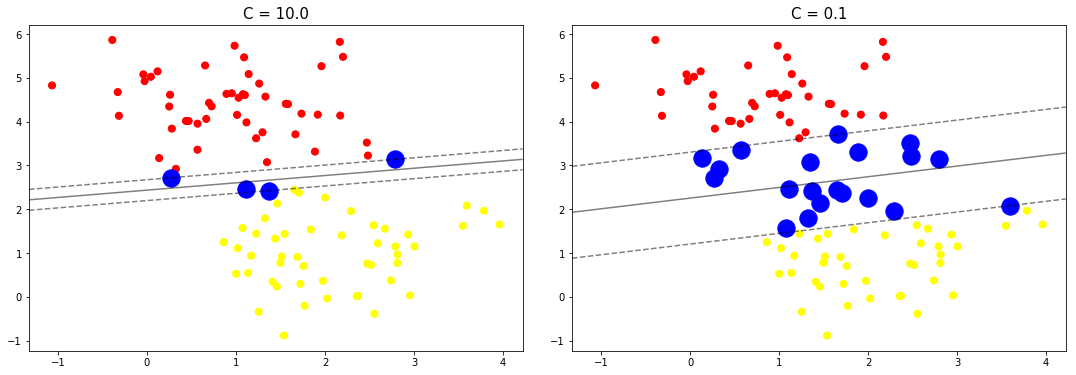

In [60]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace=0.1) #ajustamos los margenes

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)